<a href="https://colab.research.google.com/github/DonaldTurton/iLab2/blob/master/Mdoelling_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ILab2

# Libraries

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns

# Data Set BITFINIX EXCHANGE - DAILY

## Bitcoin

In [132]:
BITC_BITFINIX_url = "https://raw.githubusercontent.com/DonaldTurton/iLab2/master/Bitcoin/BITFINEX_BTCUSD%2C%201D.csv"

bitcoin_daily = pd.read_csv (BITC_BITFINIX_url)

### Ethereum

In [133]:
ETHERIUM_BITFINIX_url= 'https://raw.githubusercontent.com/DonaldTurton/iLab2/master/Ethereum/BITFINEX_ETHUSD%2C%201D.csv'

In [134]:
ethereum_daily = pd.read_csv(ETHERIUM_BITFINIX_url) 

### Ripple 

In [135]:
RIPPLE_BITFINIX_url= 'https://raw.githubusercontent.com/DonaldTurton/iLab2/master/Ripple/BITFINEX_XRPUSD%2C%201D.csv'

In [136]:
ripple_daily = pd.read_csv(RIPPLE_BITFINIX_url)

## Subset DF

## Subset DF

In [137]:
bit_bit = bitcoin_daily[['time','open', 'close', 'Volume']]
bit_bit = bit_bit.rename(columns={'open': 'BTC_open', 'close': 'BTC_close', 'Volume': 'BTC_vol'})

In [138]:
eth_bit = ethereum_daily[['time','open', 'close', 'Volume']]
eth_bit = eth_bit.rename(columns={'open': 'ETHER_open', 'close': 'ETHER_close', 'Volume': 'ETHER_vol'})

In [139]:
xrp_bit = ripple_daily[['time','open', 'close', 'Volume']]
xrp_bit = xrp_bit.rename(columns={'open': 'XRP_open', 'close': 'XRP_close', 'Volume': 'XRP_vol'})

## Merge



In [140]:
# Data frames for each coin from BITFINEX
#bit_bit 2,677 observations
#eth_bit 1,497 observations
#xrp_bit 1,176 observations

In [141]:
bit_eth = pd.merge(bit_bit, eth_bit, how='left', on=['time'])
data = pd.merge(bit_eth, xrp_bit, how='left', on=['time'])

In [142]:
#Drop NA 
data = data.dropna()
len(data) #1,174 observations after removing NA

1174

# Lag the predictor variables 7 days

In [143]:
# Duplicate the bitcoin variables before lagging
data['BTC_open_dup'] = data['BTC_open'] 
data['BTC_close_dup'] = data['BTC_close']
data['BTC_vol_dup'] = data['BTC_vol']

In [144]:
# Remove the BTC open and BTC vol variables before lagging as they  can't be used for this type of modelling strategy. 
data = data.drop(['BTC_open', 'BTC_vol'], axis = 1)

In [145]:
# Lag all variables except BTC_close

data['ETHER_open'] = data['ETHER_open'].shift(7)
data['ETHER_close'] = data['ETHER_close'].shift(7)
data['ETHER_vol'] = data['ETHER_vol'].shift(7)

data['XRP_open'] = data['XRP_open'].shift(7)
data['XRP_close'] = data['XRP_close'].shift(7)
data['XRP_vol'] = data['XRP_vol'].shift(7)

data['BTC_open_dup'] = data['BTC_open_dup'].shift(7)
data['BTC_close_dup'] = data['BTC_close_dup'].shift(7)
data['BTC_vol_dup'] = data['BTC_vol_dup'].shift(7)

In [146]:
# Drop the first 7 rows of the data set as these are NA rows due to the lagging. 
data.drop(data.head(7).index, inplace=True)

# Set the test and train sets

In [147]:
# Set the  data index as a data col
data.index = range(1,1168)

In [148]:
# May train and test sets
pd.set_option("display.max_rows", None, "display.max_columns", None)
train_may = data[1:1071]
test_may = data[1071:1078]

In [149]:
# July train and test sets
train_july = data[1:1132]
test_july = data[1132:1139]

#  Set test and train sets


In [150]:
# Select the independent variables for the first experiment in 'x' and the dependent variable 'y' for MAY
x_train_may = train_may[['ETHER_open', 'ETHER_close', 'ETHER_vol', 'XRP_open', 'XRP_close', 'XRP_vol', 'BTC_open_dup', 'BTC_close_dup', 'BTC_vol_dup']]
y_train_may = train_may['BTC_close']

# Setup testing x and y variables
x_test_may = test_may[['ETHER_open', 'ETHER_close', 'ETHER_vol', 'XRP_open', 'XRP_close', 'XRP_vol', 'BTC_open_dup', 'BTC_close_dup', 'BTC_vol_dup']]
y_test_may = test_may['BTC_close']


In [151]:
# Select the independent variables for the first experiment in 'x' and the dependent variable 'y' for JULY
x_train_july = train_july[['ETHER_open', 'ETHER_close', 'ETHER_vol', 'XRP_open', 'XRP_close', 'XRP_vol', 'BTC_open_dup', 'BTC_close_dup', 'BTC_vol_dup']]
y_train_july = train_july['BTC_close']

# Setup testing x and y variables
x_test_july = test_july[['ETHER_open', 'ETHER_close', 'ETHER_vol', 'XRP_open', 'XRP_close', 'XRP_vol', 'BTC_open_dup', 'BTC_close_dup', 'BTC_vol_dup']]
y_test_july = test_july['BTC_close']


# Random Forest - May

In [152]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [153]:
# Random Forest tunning 
RandomForestRegression = RandomForestRegressor(n_estimators=500)

In [154]:
RandomForestRegression.fit(x_train_may, y_train_may)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [155]:
rf_prediction = RandomForestRegression.predict(x_test_may)
rf_prediction = pd.DataFrame(rf_prediction)
rf_prediction.columns = ['Random Forest']
rf_prediction['index'] = range(1,8)
rf_prediction

,Random Forest,index
0,7916.919097,1
1,8059.010481,2
2,7503.599789,3
3,7056.235988,4
4,7437.152443,5
5,8237.563792,6
6,7823.286390,7


In [156]:
y_test_may = pd.DataFrame(y_test_may)
y_test_may['index'] = range(1,8)
y_test_may.columns = ['Real', 'index']

In [157]:
merge_may = y_test_may.merge(rf_prediction, on="index")

In [158]:
rf_mse = mean_squared_error(y_test_may, rf_prediction)
rf_mse

rf_rmse = np.sqrt(rf_mse)
rf_rmse

1031.2768518030177

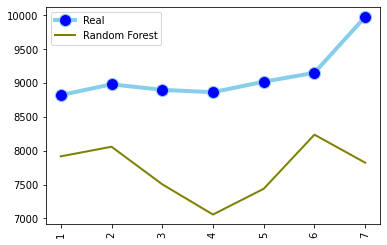

In [159]:
# Plot the predicted vs actual in matplot lib
import matplotlib.pyplot as plt
plt.plot( 'index', 'Real', data=merge_may, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'index', 'Random Forest', data=merge_may, marker='', color='olive', linewidth=2)
plt.xticks(rotation='vertical')
plt.legend()

# Linear Model - May

In [160]:
# Import the requried packages for the linear regression model
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [161]:
# Runt he linear regressor over the x and y training data
model = LinearRegression().fit(x_train_may, y_train_may)

In [162]:
# Runt he linear regressor over the x and y training data
from statsmodels.api import OLS
OLS(y_train_may,x_train_may).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              BTC_close   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              7349.
Date:                Mon, 19 Oct 2020   Prob (F-statistic):                        0.00
Time:                        07:00:30   Log-Likelihood:                         -8884.2
No. Observations:                1070   AIC:                                  1.779e+04
Df Residuals:                    1061   BIC:                                  1.783e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
ETHER_open        1.4739      1.683      0.876      0.381      -1.828       4.776
ETHER_close      -2.3614      1.689     -1.398      0.162      -5.675       0.952
ETHER_vol        -0.0003      0.000     -1.483      0.138      -0.001    9.76e-05
XRP_open      -3414.9582    740.255     -4.613      0.000   -4867.488   -1962.429
XRP_close      2925.4715    753.450      3.883      0.000    1447.051    4403.892
XRP_vol       -1.277e-06   6.51e-07     -1.961      0.050   -2.56e-06    7.72e-10
BTC_open_dup      0.1394      0.098      1.424      0.155      -0.053       0.331
BTC_close_dup     0.8844      0.097      9.096      0.000       0.694       1.075
BTC_vol_dup       0.0159      0.002      8.325      0.000       0.012       0.020
==============================================================================
Omnibus:                      147.067   Durbin-Watson:                   0.351
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1727.920
Skew:                           0.009   Prob(JB):                         0.00
Kurtosis:                       9.225   Cond. No.                     2.65e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [163]:
# Predict the model on the x_test data
y_pred_may = pd.DataFrame(model.predict(x_test_may))
y_pred_may['index'] = range(1,8)
y_pred_may

,0,index
0,7626.086948,1
1,7526.599476,2
2,7690.725950,3
3,7793.804550,4
4,7850.899369,5
5,8888.264968,6
6,8836.952715,7


In [164]:
y_test_may = pd.DataFrame(y_test_may)[0:7]
y_test_may['index'] = range(1,8)
y_test_may

,Real,index
1072,8822.800000,1
1073,8982.300000,2
1074,8899.800000,3
1075,8865.800000,4
1076,9020.100000,5
1077,9152.470993,6
1078,9979.600000,7


In [165]:
# merge the prediction and actual data frames
merge_may = merge_may.merge(y_pred_may, on='index', how='left')
merge_may

,Real,index,Random Forest,0
0,8822.800000,1,7916.919097,7626.086948
1,8982.300000,2,8059.010481,7526.599476
2,8899.800000,3,7503.599789,7690.725950
3,8865.800000,4,7056.235988,7793.804550
4,9020.100000,5,7437.152443,7850.899369
5,9152.470993,6,8237.563792,8888.264968
6,9979.600000,7,7823.286390,8836.952715


In [166]:
merge_may.columns = ['Real', 'index', 'Random Forest', 'Linear Regression']

In [167]:
from sklearn.metrics import mean_squared_error

In [168]:
MSE = mean_squared_error(y_true = merge_may.Real, y_pred = merge_may['Linear Regression'])
np.sqrt(MSE)

1127.8739928245245

In [78]:
# Calculate the r_square value for the linear model
r_sq = model.score(x_train_may, y_train_may)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8933358021588513


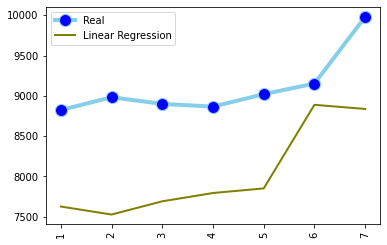

In [169]:
# Plot the predicted vs actual in matplot lib
import matplotlib.pyplot as plt
plt.plot( 'index', 'Real', data=merge_may, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'index', 'Linear Regression', data=merge_may, marker='', color='olive', linewidth=2)
plt.xticks(rotation='vertical')
plt.legend()

# Lasso Regression - May (DO NOT USE)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

lasso = Lasso()

In [ ]:
params = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

In [ ]:
lasso_regressor = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)#GridSearchCV(lasso, params, scoring = 'neg_mean_squared_error', cv=5)

In [ ]:
lasso = lasso_regressor.fit(x_train_may, y_train_may)

In [ ]:
# Predict the model on the x_test data
y_pred_may_lasso = pd.DataFrame(lasso.predict(x_test_may))
y_pred_may_lasso['index'] = range(1,8)

In [ ]:
y_pred_may_lasso

,0,index
0,7619.051456,1
1,7540.843968,2
2,7704.844636,3
3,7797.110522,4
4,7814.768118,5
5,8932.928478,6
6,8831.216923,7


In [ ]:
# merge the prediction and actual data frames
merge_may = merge_may.merge(y_pred_may_lasso, on='index', how='left')

In [ ]:
merge_may

,lm_prediction,index,real,0
0,7626.086948,1,8822.800000,7619.051456
1,7526.599476,2,8982.300000,7540.843968
2,7690.725950,3,8899.800000,7704.844636
3,7793.804550,4,8865.800000,7797.110522
4,7850.899369,5,9020.100000,7814.768118
5,8888.264968,6,9152.470993,8932.928478
6,8836.952715,7,9979.600000,8831.216923


In [ ]:
merge_may.columns = ['lm_prediction', 'index', 'real', 'lasso_prediction']

In [ ]:
MSE = mean_squared_error(y_true = merge_may.real, y_pred = merge_may.lasso_prediction)
np.sqrt(MSE)

1128.6293280870077

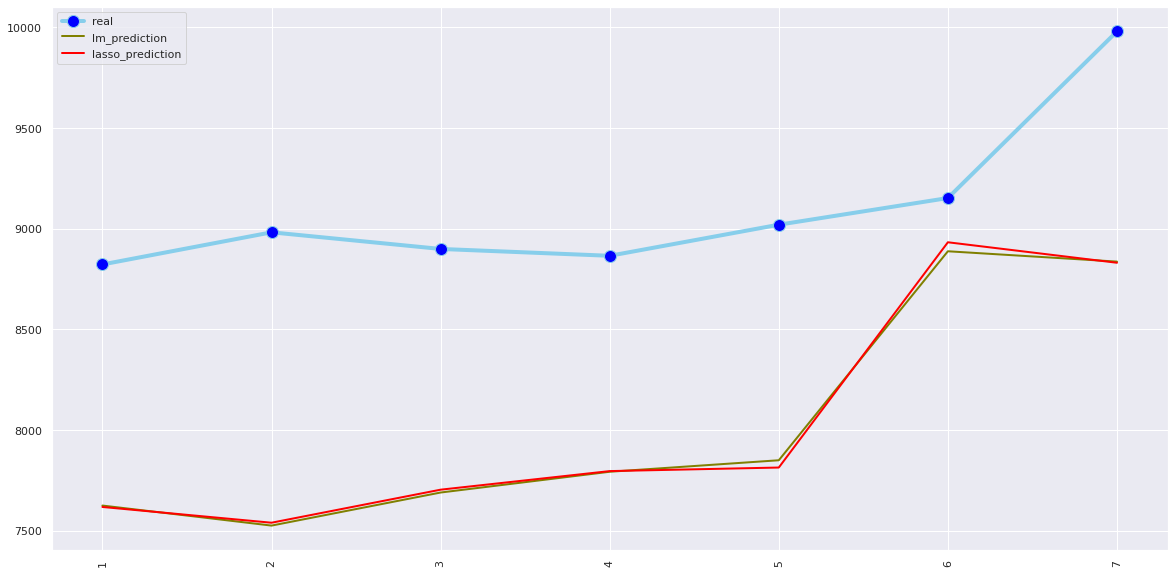

In [ ]:
# Plot the predicted vs actual in matplot lib
import matplotlib.pyplot as plt
plt.plot( 'index', 'real', data=merge_may, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'index', 'lm_prediction', data=merge_may, marker='', color='olive', linewidth=2)
plt.plot( 'index', 'lasso_prediction', data=merge_may, marker='', color='red', linewidth=2)
plt.xticks(rotation='vertical')
plt.legend()

# Support Vector Regression - May

In [170]:
# Import the algorithm package
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [171]:
y_train_may = pd.DataFrame(y_train_may)

In [172]:
#3 Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(x_train_may)
y = sc_y.fit_transform(y_train_may)

In [173]:
y = y[:, 0]

In [174]:
# Load the SVR and fit
#svr = SVR(kernel='poly')
svr_regressor = SVR(kernel = 'poly')
SVR_reg = svr_regressor.fit(X, y)

In [175]:
# Predict the model on the x_test data
x_test_may = sc_X.fit_transform(x_test_may)

y_pred_may_svr = SVR_reg.predict(x_test_may)
y_pred_may_svr = sc_y.inverse_transform(y_pred_may_svr) 

y_pred_may_svr = pd.DataFrame(y_pred_may_svr)
y_pred_may_svr['index'] = range(1,8)

In [176]:
# merge the prediction and actual data frames
merge_may = merge_may.merge(y_pred_may_svr, on='index', how='left')

In [177]:
merge_may

,Real,index,Random Forest,Linear Regression,0
0,8822.800000,1,7916.919097,7626.086948,6233.990297
1,8982.300000,2,8059.010481,7526.599476,6457.953900
2,8899.800000,3,7503.599789,7690.725950,6479.903842
3,8865.800000,4,7056.235988,7793.804550,6640.965524
4,9020.100000,5,7437.152443,7850.899369,6510.529127
5,9152.470993,6,8237.563792,8888.264968,7965.608332
6,9979.600000,7,7823.286390,8836.952715,14049.828929


In [178]:
merge_may.columns = ['Real', 'index', 'Random Forest', 'Linear Regression', 'Support Vector Regression']

In [91]:
#merge_may['Avg'] = (merge_may['lm_prediction'] + merge_may['random_forest']) / 2

#merge_may

In [179]:
MSE = mean_squared_error(y_true = merge_may.Real, y_pred = merge_may['Support Vector Regression'])
np.sqrt(MSE)

2622.7955982329245

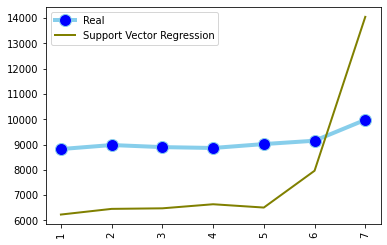

In [180]:
# Plot the predicted vs actual in matplot lib
import matplotlib.pyplot as plt
plt.plot( 'index', 'Real', data=merge_may, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'index', 'Support Vector Regression', data=merge_may, marker='', color='olive', linewidth=2)
plt.xticks(rotation='vertical')
plt.legend()

# Vanilla Neural Network - May

In [181]:
%tensorflow_version 2.x

In [182]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [183]:
# Standardise the two data sets as a neural network requires standardised data

scaled_X_train = scale(x_train_may)
scaled_X_test = scale(x_test_may)

In [184]:
# Set the seed for the modelling exercises in order to get reproducible results

tf.random.set_seed(168)
np.random.seed(168)

In [185]:
from tensorflow.keras.layers import Dense, Dropout

In [186]:
# Create a sequential model 
model = tf.keras.Sequential()

In [187]:
# create the architecture for the neural network
layer1 = Dense(128, activation='relu', input_shape=[9])

layer2 = Dense(128, activation='relu')

layer3 = Dense(128, activation='relu')

top_layer = Dense(1)

In [188]:
# Add the layers into the model

model.add(layer1)
model.add(Dropout(0.5))
model.add(layer2)
model.add(Dropout(0.5))
model.add(layer3)
model.add(Dropout(0.5))
model.add(top_layer)

In [189]:
# Specify the optimizer to be used during the back propgation
optimizer = tf.keras.optimizers.Adam(0.0001)

In [190]:
# Compile the model architecture

model.compile(loss='mean_squared_error', optimizer=optimizer)

In [191]:
# Print a summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1280      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

In [192]:
history = model.fit(scaled_X_train, y_train_may, epochs=250, validation_split = 0.3)

Epoch 1/250
24/24 [==============================] - 0s 7ms/step - loss: 51912752.0000 - val_loss: 80201336.0000
Epoch 2/250
24/24 [==============================] - 0s 3ms/step - loss: 51909476.0000 - val_loss: 80198656.0000
Epoch 3/250
24/24 [==============================] - 0s 3ms/step - loss: 51904596.0000 - val_loss: 80195320.0000
Epoch 4/250
24/24 [==============================] - 0s 3ms/step - loss: 51899964.0000 - val_loss: 80190928.0000
Epoch 5/250
24/24 [==============================] - 0s 3ms/step - loss: 51893492.0000 - val_loss: 80184992.0000
Epoch 6/250
24/24 [==============================] - 0s 3ms/step - loss: 51884320.0000 - val_loss: 80176928.0000
Epoch 7/250
24/24 [==============================] - 0s 3ms/step - loss: 51872888.0000 - val_loss: 80165608.0000
Epoch 8/250
24/24 [==============================] - 0s 3ms/step - loss: 51856164.0000 - val_loss: 80149896.0000
Epoch 9/250
24/24 [==============================] - 0s 3ms/step - loss: 51830636.0000 - val_los

In [193]:
# Make a prediction
preds = model.predict(scaled_X_test)

In [195]:
preds = pd.DataFrame(preds)
preds['index'] = range(1,8)
preds.columns = ['Vanilla Neural Network', 'index']
preds

,Vanilla Neural Network,index
0,6611.976074,1
1,5955.514648,2
2,6505.468750,3
3,6887.428711,4
4,6012.340820,5
5,7930.229004,6
6,10340.980469,7


In [196]:
merge_may = merge_may.merge(preds, on = 'index')
merge_may

,Real,index,Random Forest,Linear Regression,Support Vector Regression,Vanilla Neural Network
0,8822.800000,1,7916.919097,7626.086948,6233.990297,6611.976074
1,8982.300000,2,8059.010481,7526.599476,6457.953900,5955.514648
2,8899.800000,3,7503.599789,7690.725950,6479.903842,6505.468750
3,8865.800000,4,7056.235988,7793.804550,6640.965524,6887.428711
4,9020.100000,5,7437.152443,7850.899369,6510.529127,6012.340820
5,9152.470993,6,8237.563792,8888.264968,7965.608332,7930.229004
6,9979.600000,7,7823.286390,8836.952715,14049.828929,10340.980469


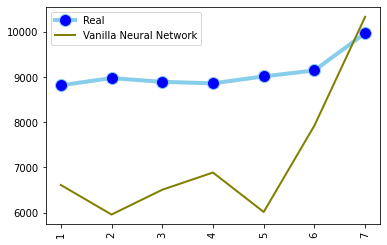

In [197]:
# Plot the predicted vs actual in matplot lib
import matplotlib.pyplot as plt
plt.plot( 'index', 'Real', data=merge_may, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'index', 'Vanilla Neural Network', data=merge_may, marker='', color='olive', linewidth=2)
plt.xticks(rotation='vertical')
plt.legend()

In [198]:
MSE = mean_squared_error(y_true = merge_may.Real, y_pred = merge_may['Vanilla Neural Network'])
np.sqrt(MSE)

2215.756358914712

# Random Forest - July

In [ ]:
RandomForestRegression.fit(x_train_july, y_train_july)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
rf_prediction_july = RandomForestRegression.predict(x_test_july)
rf_prediction_july = pd.DataFrame(rf_prediction_july)
rf_prediction_july.columns = ['Random Forest']
rf_prediction_july['index'] = range(1,8)
rf_prediction_july

,Random Forest,index
0,9376.634625,1
1,9338.414771,2
2,9164.883323,3
3,9273.250880,4
4,9341.943526,5
5,9211.809079,6
6,9248.271523,7


In [ ]:
y_test_july = pd.DataFrame(y_test_july)
y_test_july['index'] = range(1,8)
y_test_july.columns = ['Real', 'index']
y_test_july

,Real,index
1133,9239.900000,1
1134,9100.000000,2
1135,9073.200000,3
1136,9147.700000,4
1137,9084.284734,5
1138,9361.100000,6
1139,9267.514949,7


In [ ]:
merge_july = y_test_july.merge(rf_prediction_july, on = 'index')

In [ ]:
merge_july

,Real,index,Random Forest
0,9239.900000,1,9376.634625
1,9100.000000,2,9338.414771
2,9073.200000,3,9164.883323
3,9147.700000,4,9273.250880
4,9084.284734,5,9341.943526
5,9361.100000,6,9211.809079
6,9267.514949,7,9248.271523


In [ ]:
rf_mse = mean_squared_error(merge_july.Real, merge_july['Random Forest'])
rf_mse

rf_rmse = np.sqrt(rf_mse)
rf_rmse

164.20934259606918

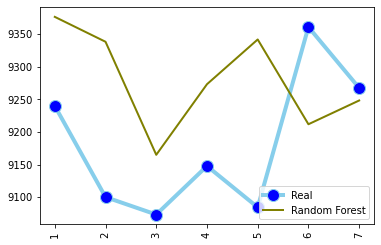

In [ ]:
# Plot the predicted vs actual in matplot lib
import matplotlib.pyplot as plt
plt.plot( 'index', 'Real', data=merge_july, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'index', 'Random Forest', data=merge_july, marker='', color='olive', linewidth=2)
plt.xticks(rotation='vertical')
plt.legend()

# Linear Model - July

In [94]:
# Runt he linear regressor over the x and y training data
model = LinearRegression().fit(x_train_july, y_train_july)

In [95]:
# Runt he linear regressor over the x and y training data
from statsmodels.api import OLS
OLS(y_train_july,x_train_july).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              BTC_close   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              8241.
Date:                Mon, 19 Oct 2020   Prob (F-statistic):                        0.00
Time:                        06:40:46   Log-Likelihood:                         -9371.7
No. Observations:                1131   AIC:                                  1.876e+04
Df Residuals:                    1122   BIC:                                  1.881e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
ETHER_open        1.4717      1.651      0.891      0.373      -1.768       4.712
ETHER_close      -2.3577      1.657     -1.423      0.155      -5.609       0.893
ETHER_vol        -0.0003      0.000     -1.451      0.147      -0.001       0.000
XRP_open      -3442.9932    726.922     -4.736      0.000   -4869.273   -2016.714
XRP_close      2938.4025    739.956      3.971      0.000    1486.550    4390.255
XRP_vol       -1.306e-06   6.39e-07     -2.042      0.041   -2.56e-06   -5.12e-08
BTC_open_dup      0.1473      0.094      1.560      0.119      -0.038       0.332
BTC_close_dup     0.8783      0.094      9.367      0.000       0.694       1.062
BTC_vol_dup       0.0158      0.002      8.462      0.000       0.012       0.019
==============================================================================
Omnibus:                      157.657   Durbin-Watson:                   0.352
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1921.012
Skew:                           0.006   Prob(JB):                         0.00
Kurtosis:                       9.385   Cond. No.                     2.65e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [98]:
# Predict the model on the x_test data
y_pred_july = pd.DataFrame(model.predict(x_test_july))
y_pred_july['index'] = range(1,8)
y_pred_july.columns = ['Linear Regression', 'index']
y_pred_july

,Linear Regression,index
0,9287.319380,1
1,9240.831789,2
2,9167.753549,3
3,8987.913877,4
4,9070.336208,5
5,9168.129820,6
6,9126.409153,7


In [97]:
y_test_july = pd.DataFrame(y_test_july)[0:7]
y_test_july['index'] = range(1,8)
y_test_july

,Real,index
1133,9239.900000,1
1134,9100.000000,2
1135,9073.200000,3
1136,9147.700000,4
1137,9084.284734,5
1138,9361.100000,6
1139,9267.514949,7


In [99]:
# merge the prediction and actual data frames
merge_july = merge_july.merge(y_pred_july, on='index', how='left')

In [101]:
MSE = mean_squared_error(y_true = merge_july.Real, y_pred = merge_july['Linear Regression'])
np.sqrt(MSE)

127.55786750036722

In [102]:
# Calculate the r_square value for the linear model
r_sq = model.score(x_train_july, y_train_july)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8942229300571196


ValueError: ignored

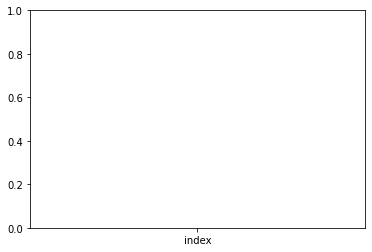

In [128]:
# Plot the predicted vs actual in matplot lib
import matplotlib.pyplot as plt
plt.plot( 'index', 'Real', data=merge_july, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'index', 'Linear Regression', data=merge_july, marker='', color='olive', linewidth=2)
plt.xticks(rotation='vertical')
plt.legend()

# Lasso Regression - July

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()

In [ ]:
params = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

In [ ]:
lasso_regressor = GridSearchCV(lasso, params, scoring = 'neg_mean_squared_error', cv=5)

In [ ]:
lasso = lasso_regressor.fit(x_train_july, y_train_july)

In [ ]:
print(lasso.best_params_)

{'alpha': 1e-15}


In [ ]:
print(lasso.best_score_)

-997010.4666424043


In [ ]:
# Predict the model on the x_test data
y_pred_july_lasso = pd.DataFrame(lasso.predict(x_test_july))
y_pred_july_lasso['index'] = range(1,8)

In [ ]:
# merge the prediction and actual data frames
merge_july = merge_july.merge(y_pred_july_lasso, on='index', how='left')

In [ ]:
merge_july.columns = ['lm_prediction', 'index', 'real', 'lasso_prediction']

In [ ]:
MSE = mean_squared_error(y_true = merge_july.real, y_pred = merge_july.lasso_prediction)
np.sqrt(MSE)

127.57497646038792

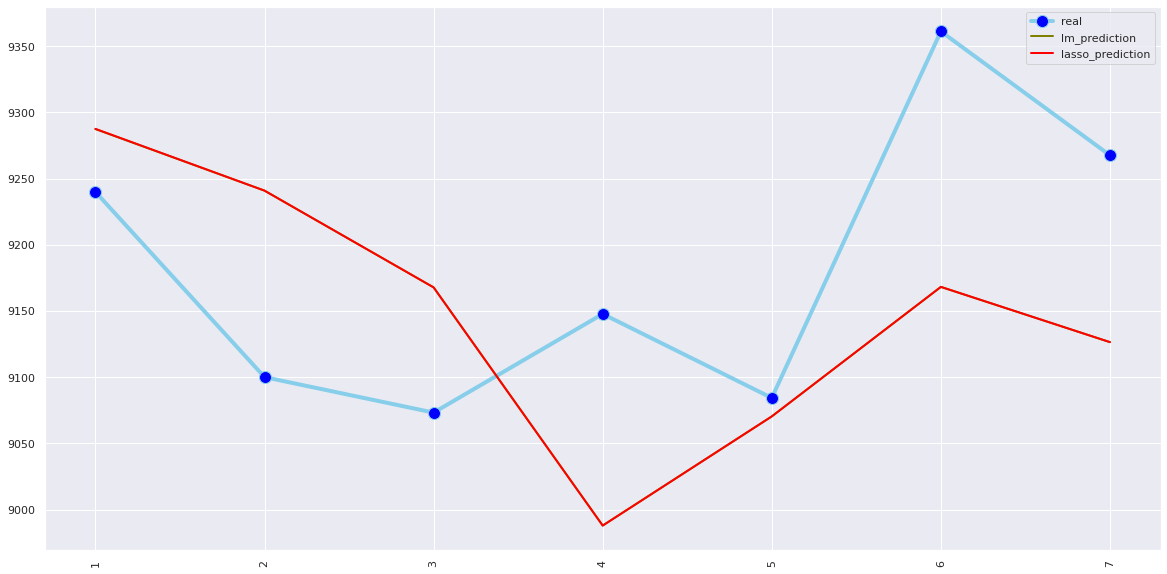

In [ ]:
# Plot the predicted vs actual in matplot lib
import matplotlib.pyplot as plt
plt.plot( 'index', 'real', data=merge_july, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'index', 'lm_prediction', data=merge_july, marker='', color='olive', linewidth=2)
plt.plot( 'index', 'lasso_prediction', data=merge_july, marker='', color='red', linewidth=2)
plt.xticks(rotation='vertical')
plt.legend()

# Support Vector Regression - July

In [104]:
# Import the algorithm package
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [105]:
y_train_july = pd.DataFrame(y_train_july)

In [106]:
#3 Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(x_train_july)
y = sc_y.fit_transform(y_train_july)

In [107]:
y = y[:, 0]

In [108]:
# Load the SVR and fit
#svr = SVR(kernel='poly')
svr_regressor = SVR(kernel = 'rbf')
SVR_reg = svr_regressor.fit(X, y)

In [109]:
# Predict the model on the x_test data
x_test_july = sc_X.fit_transform(x_test_july)

y_pred_july_svr = SVR_reg.predict(x_test_july)
y_pred_july_svr = sc_y.inverse_transform(y_pred_july_svr) 


y_pred_july_svr = pd.DataFrame(y_pred_july_svr)
y_pred_july_svr['index'] = range(1,8)

In [111]:
# merge the prediction and actual data frames
merge_july = merge_july.merge(y_pred_july_svr, on='index', how='left')

In [116]:
merge_july.columns = ['Real', 'Index', 'Random Forest', 'Linear Regression', 'Support Vector Regression']

In [126]:
#merge_july['Average'] = (merge_july['lm_prediction'] + merge_july['random_forest'])/2

ValueError: ignored

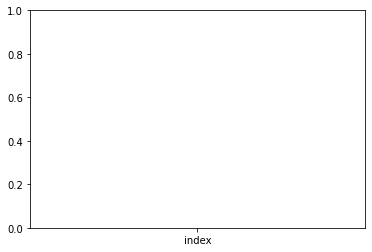

In [130]:
# Plot the predicted vs actual in matplot lib
import matplotlib.pyplot as plt
plt.plot( 'index', 'Real', data=merge_july, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'index', 'Support Vector Regression', data=merge_july, marker='', color='olive', linewidth=2)
plt.xticks(rotation='vertical')
plt.legend()

# Vanilla Neural Network - July



In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [ ]:
# Standardise the two data sets as a neural network requires standardised data

scaled_X_train = scale(x_train_july)
scaled_X_test = scale(x_test_july)
scaled_y_train = scale(y_train_july)
scaled_y_test = scale(y_test_july)

In [ ]:
# Set the seed for the modelling exercises in order to get reproducible results

tf.random.set_seed(168)
np.random.seed(168)

In [ ]:
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
# Create a sequential model 

model = tf.keras.Sequential()

In [ ]:
# create the architecture for the neural network

layer1 = Dense(512, activation='relu', input_shape=[9])

layer2 = Dense(512, activation='relu')

layer3 = Dense(512, activation='relu')

layer4 = Dense(512, activation='relu')

#layer5 = Dense(512, activation='relu')

top_layer = Dense(1)

In [ ]:
# Add the layers into the model

model.add(layer1)
model.add(Dropout(0.5))
model.add(layer2)
model.add(Dropout(0.5))
model.add(layer3)
model.add(Dropout(0.5))
model.add(layer4)
model.add(Dropout(0.5))
#model.add(layer5)
#model.add(Dropout(0.5))
model.add(top_layer)

In [ ]:
# Specify the optimizer to be used during the back propgation
optimizer = tf.keras.optimizers.Adam(0.0001)

In [ ]:
# Compile the model architecture

model.compile(loss='mean_squared_error', optimizer=optimizer)

In [ ]:
# Print a summary of the model
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 512)               5120      
_________________________________________________________________
dropout_39 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_101 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_40 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_102 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_41 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_103 (Dense)            (None, 512)             

In [ ]:
history = model.fit(scaled_X_train, y_train_july, epochs=200, validation_split = 0.2)

Epoch 1/200
29/29 [==============================] - 0s 9ms/step - loss: 59912436.0000 - val_loss: 69679960.0000
Epoch 2/200
29/29 [==============================] - 0s 4ms/step - loss: 59853984.0000 - val_loss: 69594336.0000
Epoch 3/200
29/29 [==============================] - 0s 5ms/step - loss: 59548204.0000 - val_loss: 69056224.0000
Epoch 4/200
29/29 [==============================] - 0s 4ms/step - loss: 57888708.0000 - val_loss: 66409248.0000
Epoch 5/200
29/29 [==============================] - 0s 5ms/step - loss: 51350244.0000 - val_loss: 57654672.0000
Epoch 6/200
29/29 [==============================] - 0s 5ms/step - loss: 35856768.0000 - val_loss: 38610940.0000
Epoch 7/200
29/29 [==============================] - 0s 4ms/step - loss: 19950588.0000 - val_loss: 18352114.0000
Epoch 8/200
29/29 [==============================] - 0s 5ms/step - loss: 15072113.0000 - val_loss: 9811675.0000
Epoch 9/200
29/29 [==============================] - 0s 4ms/step - loss: 12263791.0000 - val_loss

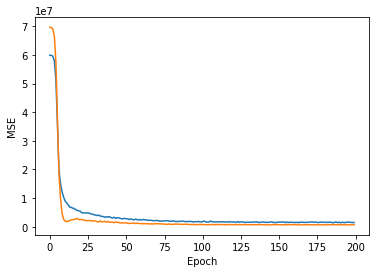

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='MSE training')
plt.plot(history.history['val_loss'], label='MSE validation')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.show()

In [ ]:
# Make a prediction
preds = model.predict(scaled_X_test)

In [ ]:
preds

array([[10503.685 ],
       [ 9249.4   ],
       [ 7726.5615],
       [ 3567.4812],
       [ 6003.237 ],
       [ 7986.7144],
       [ 7013.7124]], dtype=float32)

In [ ]:
y_test_july

1133    9239.900000
1134    9100.000000
1135    9073.200000
1136    9147.700000
1137    9084.284734
1138    9361.100000
1139    9267.514949
Name: BTC_close, dtype: float64

# UNIVARIATE MULTISTEP LSTM

In [ ]:
# Ensure we are using Tensorflow 2
%tensorflow_version 2.x

# multivariate output stacked lstm example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras import optimizers
import tensorflow as tf
from keras.layers import Dropout

# Set seeds for numpy and tensorflow
tf.random.set_seed(12)
np.random.seed(12)

In [ ]:
# We will train on first 1153 and test on last 14, ie, 7 steps in and 7 steps out
#train = data.head(1160)
#test = data.tail(14)

train = data[1:1064]
test = data[1064:1085]

train = list(train.BTC_close)
test = list(test.BTC_close)

In [ ]:
# multi-step data preparation
from numpy import array
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# define input sequence for TRAIN
train_seq = train
# choose a number of time steps
n_steps_in, n_steps_out = 14, 7
# split into samples
X_train, y_train = split_sequence(train_seq, n_steps_in, n_steps_out)
# summarize the data


# define input sequence for TEST
test_seq = test
# choose a number of time steps
n_steps_in, n_steps_out = 14, 7
# split into samples
X_test, y_test = split_sequence(test_seq, n_steps_in, n_steps_out)
# summarize the data

#for i in range(len(X)):
#	print(X[i], y[i])

In [ ]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

In [ ]:
# define model
model = Sequential()

In [ ]:
# Add the layers
model.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(200, activation='relu'))
model.add(Dense(n_steps_out))

In [ ]:
# Setup the learning rate
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Use early stopping, change patience as required
early_stopping = EarlyStopping(monitor='val_loss', patience=50,verbose=1)

# Use reduce LR, change patience and factor as required
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.00001, verbose=1)

learning_rate = 0.01
optimizer = optimizers.Adam(learning_rate = learning_rate)

In [ ]:
# Compile the model
model.compile(optimizer=optimizer, loss='mse')

In [ ]:
# View the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 14, 200)           161600    
_________________________________________________________________
lstm_5 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 1407      
Total params: 483,807
Trainable params: 483,807
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Setup the learning rate
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Use early stopping, change patience as required
early_stopping = EarlyStopping(monitor='val_loss', patience=50,verbose=1)

# Use reduce LR, change patience and factor as required
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.00001, verbose=1)

learning_rate = 0.01
optimizer = optimizers.Adam(learning_rate = learning_rate)

In [ ]:
# fit model
model.fit(X_train, y_train, epochs=100, validation_split=0.3, callbacks = [early_stopping, reduce_lr])

Epoch 1/100
23/23 [==============================] - 1s 49ms/step - loss: 24404364.0000 - val_loss: 15170372.0000
Epoch 2/100
23/23 [==============================] - 1s 39ms/step - loss: 5174175.0000 - val_loss: 5250124.0000
Epoch 3/100
23/23 [==============================] - 1s 43ms/step - loss: 5909684.5000 - val_loss: 4065178.2500
Epoch 4/100
23/23 [==============================] - 1s 40ms/step - loss: 4341751.0000 - val_loss: 3020327.5000
Epoch 5/100
23/23 [==============================] - 1s 41ms/step - loss: 3097032.2500 - val_loss: 1592835.5000
Epoch 6/100
23/23 [==============================] - 1s 39ms/step - loss: 2502305.0000 - val_loss: 1784745.5000
Epoch 7/100
23/23 [==============================] - 1s 39ms/step - loss: 2458710.5000 - val_loss: 1794902.8750
Epoch 8/100
23/23 [==============================] - 1s 52ms/step - loss: 2355767.0000 - val_loss: 1993119.1250
Epoch 9/100
23/23 [==============================] - 1s 44ms/step - loss: 2434400.5000 - val_loss: 202

In [ ]:
# Create the predictions data frame
yhat_stacked = pd.DataFrame(np.reshape(np.array(model.predict(X_test, verbose=0)), (7,1)))

yhat_stacked.columns = ['predictions']

In [ ]:
# Create the test set data frame
y_test = pd.DataFrame(np.reshape(np.array(y_test), (7,1)))

y_test.columns = ['real']

In [ ]:
predictions = pd.concat([yhat_stacked, y_test], axis=1, sort=False)

In [ ]:
predictions.columns = ['stacked', 'real']

In [ ]:
import matplotlib.pyplot as plt

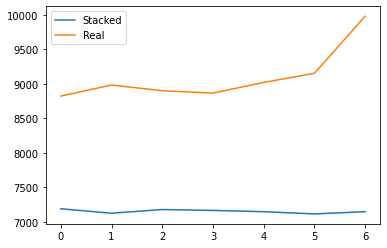

In [ ]:
# Plot the predictions against the truth

plt.plot(predictions.index, predictions.stacked, label = "Stacked")
plt.plot(predictions.index, predictions.real, label = "Real")
plt.legend(loc="upper left")

In [ ]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

rmse_val = rmse(predictions.stacked, predictions.real)

rmse_val

1988.8496875319317

# Encoder-Decoder Univariate LSTM

In [ ]:
# univariate multi-step encoder-decoder lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

In [ ]:
#Define the same modelling procure as the multi-step univariate LSTM, but include the RepeatVector function between each LSTM layer
# define model
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(RepeatVector(n_steps_out))
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')

In [ ]:
# fit model
model.fit(X_train, y_train, epochs=200, validation_split=0.3, callbacks = [early_stopping, reduce_lr])

Epoch 1/200
23/23 [==============================] - 1s 42ms/step - loss: 25198406.0000 - val_loss: 29560612.0000
Epoch 2/200
23/23 [==============================] - 1s 31ms/step - loss: 12550944.0000 - val_loss: 16806418.0000
Epoch 3/200
23/23 [==============================] - 1s 30ms/step - loss: 10266745.0000 - val_loss: 12488601.0000
Epoch 4/200
23/23 [==============================] - 1s 37ms/step - loss: 6589259.0000 - val_loss: 7507844.5000
Epoch 5/200
23/23 [==============================] - 1s 34ms/step - loss: 4930221.0000 - val_loss: 5149020.5000
Epoch 6/200
23/23 [==============================] - 1s 30ms/step - loss: 4968579.0000 - val_loss: 5874100.0000
Epoch 7/200
23/23 [==============================] - 1s 33ms/step - loss: 3883723.7500 - val_loss: 7000896.5000
Epoch 8/200
23/23 [==============================] - 1s 43ms/step - loss: 10350472.0000 - val_loss: 16599817.0000
Epoch 9/200
23/23 [==============================] - 1s 31ms/step - loss: 7906278.0000 - val_los

In [ ]:
# Create the predictions data frame
yhat_enc_dec = pd.DataFrame(np.reshape(np.array(model.predict(X_test, verbose=0)), (7,1)))

yhat_enc_dec.columns = ['encoder_decoder']

In [ ]:
# Create the test set data frame
#y_test = pd.DataFrame(np.reshape(np.array(y_test), (14,1)))

#y_test.columns = ['real']

In [ ]:
predictions = pd.concat([predictions, yhat_enc_dec], axis=1, sort=False)

In [ ]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'bottom left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


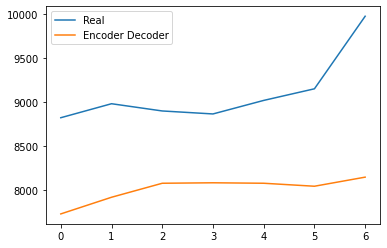

In [ ]:
# Plot the predictions against the truth

plt.plot(predictions.index, predictions.real, label = "Real")
#plt.plot(predictions.index, predictions.stacked)
plt.plot(predictions.index, predictions.encoder_decoder, label = "Encoder Decoder")
plt.legend(loc="bottom left")

In [ ]:
rmse(predictions.encoder_decoder, predictions.real)

1141.7187858876928

# CNN-LSTM

In [ ]:
# univariate bidirectional lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
from keras.layers import Flatten
from keras.layers import ConvLSTM2D

In [ ]:
# choose a number of time steps
# multi-step data preparation
from numpy import array
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# define input sequence for TRAIN
train_seq = train
# choose a number of time steps
n_steps_in, n_steps_out = 14, 7
# split into samples
X_train, y_train = split_sequence(train_seq, n_steps_in, n_steps_out)
# summarize the data


# define input sequence for TEST
test_seq = test
# choose a number of time steps
n_steps_in, n_steps_out = 14, 7
# split into samples
X_test, y_test = split_sequence(test_seq, n_steps_in, n_steps_out)

In [ ]:
n_features = 1
n_seq = 2
n_steps = 7

X_train = X_train.reshape((X_train.shape[0], n_seq, 1, n_steps, n_features))

In [ ]:
n_features = 1
n_seq = 2
n_steps = 7

X_test = X_test.reshape((X_test.shape[0], n_seq, 1, n_steps, n_features))

In [ ]:
# define model
model = Sequential()

In [ ]:
model.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(n_seq, 1, n_steps, n_features)))
model.add(Flatten())
model.add(Dense(n_steps_out))

In [ ]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_1 (ConvLSTM2D)  (None, 1, 6, 64)          33536     
_________________________________________________________________
flatten_1 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 2695      
Total params: 36,231
Trainable params: 36,231
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=200, validation_split=0.3, callbacks = [early_stopping, reduce_lr])

Epoch 1/200
23/23 [==============================] - 1s 30ms/step - loss: 49325896.0000 - val_loss: 62848532.0000
Epoch 2/200
23/23 [==============================] - 0s 15ms/step - loss: 27138148.0000 - val_loss: 15216787.0000
Epoch 3/200
23/23 [==============================] - 0s 14ms/step - loss: 3922152.2500 - val_loss: 1463752.7500
Epoch 4/200
23/23 [==============================] - 0s 14ms/step - loss: 1666349.7500 - val_loss: 1061445.3750
Epoch 5/200
23/23 [==============================] - 0s 14ms/step - loss: 1481773.1250 - val_loss: 1058679.5000
Epoch 6/200
23/23 [==============================] - 0s 13ms/step - loss: 1519567.3750 - val_loss: 1059192.3750
Epoch 7/200
23/23 [==============================] - 0s 13ms/step - loss: 1438552.2500 - val_loss: 1013094.8750
Epoch 8/200
23/23 [==============================] - 0s 15ms/step - loss: 1411369.1250 - val_loss: 941994.9375
Epoch 9/200
23/23 [==============================] - 0s 13ms/step - loss: 1429227.0000 - val_loss: 10

In [ ]:
yhat_cnn = pd.DataFrame(np.reshape(model.predict(X_test), (7,1)))

yhat_cnn.columns = ['CNN']

yhat_cnn

,CNN
0,7779.452148
1,7834.411621
2,7787.700684
3,7695.085449
4,7924.594238
5,7656.398926
6,7880.287598


In [ ]:
predictions = pd.concat([predictions, yhat_cnn], axis=1, sort=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


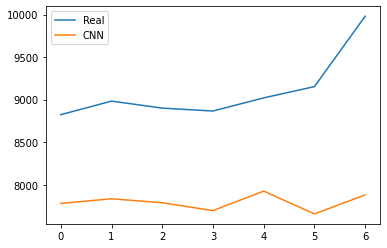

In [ ]:
# Plot the predictions against the truth

plt.plot(predictions.index, predictions.real, label = "Real")
#plt.plot(predictions.index, predictions.stacked, label = "Stacked")
#plt.plot(predictions.index, predictions.encoder_decoder, label = "Encoder Decoder")
plt.plot(predictions.index, predictions.CNN, label = "CNN")
plt.legend(loc="bottom right")

In [ ]:
rmse(predictions.CNN, predictions.real)

1355.3616800872412

In [ ]:
rmse(predictions.stacked, predictions.real)

100.24406118750824

In [ ]:
rmse(predictions.encoder_decoder, predictions.real)

314.90066854586377

# CLASSIFICATION

In [ ]:
# Create the binary outcome variable
data['btc_bin'] = data['BTC_close']

In [ ]:
data['btc_lag'] = data['btc_bin'].shift(1)

In [ ]:
data['BTC_binary'] = np.where(data.BTC_close > data.btc_lag, 1, 0)

In [ ]:
# Duplicate the bitcoin variables before lagging
data['BTC_open_dup'] = data['BTC_open'] 
data['BTC_close_dup'] = data['BTC_close']
data['BTC_vol_dup'] = data['BTC_vol']

In [ ]:
# Remove the BTC open and BTC vol variables before lagging as they  can't be used for this type of modelling strategy. 
data = data.drop(['BTC_open', 'BTC_vol'], axis = 1)

In [ ]:
# Lag all variables except BTC_close

data['ETHER_open'] = data['ETHER_open'].shift(7)
data['ETHER_close'] = data['ETHER_close'].shift(7)
data['ETHER_vol'] = data['ETHER_vol'].shift(7)

data['XRP_open'] = data['XRP_open'].shift(7)
data['XRP_close'] = data['XRP_close'].shift(7)
data['XRP_vol'] = data['XRP_vol'].shift(7)

data['BTC_open_dup'] = data['BTC_open_dup'].shift(7)
data['BTC_close_dup'] = data['BTC_close_dup'].shift(7)
data['BTC_vol_dup'] = data['BTC_vol_dup'].shift(7)

In [ ]:
# Drop the first 7 rows of the data set as these are NA rows due to the lagging. 
data.drop(data.head(7).index, inplace=True)

In [ ]:
# Set the  data index as a data col
data.index = range(1,1168)

In [ ]:
# May train and test sets
pd.set_option("display.max_rows", None, "display.max_columns", None)
train_may = data[1:1071]
test_may = data[1071:1078]

In [ ]:
# July train and test sets
train_july = data[1:1132]
test_july = data[1132:1139]

In [ ]:
# Select the independent variables for the first experiment in 'x' and the dependent variable 'y' for MAY
x_train_may = train_may[['ETHER_open', 'ETHER_close', 'ETHER_vol', 'XRP_open', 'XRP_close', 'XRP_vol', 'BTC_open_dup', 'BTC_close_dup', 'BTC_vol_dup']]
y_train_may = train_may['BTC_binary']

# Setup testing x and y variables
x_test_may = test_may[['ETHER_open', 'ETHER_close', 'ETHER_vol', 'XRP_open', 'XRP_close', 'XRP_vol', 'BTC_open_dup', 'BTC_close_dup', 'BTC_vol_dup']]
y_test_may = test_may['BTC_binary']


In [ ]:
# Select the independent variables for the first experiment in 'x' and the dependent variable 'y' for JULY
x_train_july = train_july[['ETHER_open', 'ETHER_close', 'ETHER_vol', 'XRP_open', 'XRP_close', 'XRP_vol', 'BTC_open_dup', 'BTC_close_dup', 'BTC_vol_dup']]
y_train_july = train_july['BTC_binary']

# Setup testing x and y variables
x_test_july = test_july[['ETHER_open', 'ETHER_close', 'ETHER_vol', 'XRP_open', 'XRP_close', 'XRP_vol', 'BTC_open_dup', 'BTC_close_dup', 'BTC_vol_dup']]
y_test_july = test_july['BTC_binary']


In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [ ]:
# Standardise the two data sets as a neural network requires standardised data

scaled_X_train = scale(x_train_may)
scaled_X_test = scale(x_test_may)

# Logistic Classification - May

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

In [ ]:
logisticRegr.fit(x_train_may, y_train_may)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = logisticRegr.predict(x_train_may)

In [ ]:
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
y_test_may

1072    1
1073    1
1074    0
1075    0
1076    1
1077    1
1078    1
Name: BTC_binary, dtype: int64

In [ ]:
score = logisticRegr.score(x_test_may, y_test_may)
print(score)

0.5714285714285714


# Random Forest Classifier - May

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
rf = RandomForestClassifier(n_estimators=1000, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
rf.fit(x_train_may, y_train_may)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Actual class predictions
rf_predictions = rf.predict(x_test_may)

In [ ]:
rf_predictions

array([1, 1, 1, 1, 1, 1, 1])

In [ ]:
rf_score = rf.score(x_test_may, y_test_may)
print(rf_score)

0.7142857142857143


# XGBoost Classifier - May

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
#from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV   #Perforing grid search

In [ ]:
xgb = XGBClassifier()
xgb.fit(x_train_may, y_train_may)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# Actual class predictions
xgb_predictions = xgb.predict(x_test_may)

In [ ]:
xgb_predictions

array([1, 1, 1, 1, 0, 1, 1])

In [ ]:
xgb_score = xgb.score(x_test_may, y_test_may)
print(xgb_score)

0.5714285714285714


In [ ]:
#param_test1 = {
# 'max_depth':range(1,5),
# 'min_child_weight':range(1,5)
#}
#gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.01, n_estimators=500, max_depth=5,
# min_child_weight=1, gamma=0, subsample=0.3, colsample_bytree=0.3,
# objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
# param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
#gsearch1.fit(x_train_may, y_train_may)
#gsearch1.best_params_, gsearch1.best_score_

In [ ]:
#param = {
#    'eta': 0.3, 
#    'max_depth': 3,  
#    'objective': 'multi:softprob',  
#    'num_class': 3} 

#steps = 20  # The number of training iterations


#D_train = xgb.DMatrix(x_train_may, label=y_train_may)

#xgb = xgb.train(param, D_train, steps)